Final Run Statistics: --- 

 Number of steps                                 : 463
 Number of function evaluations                  : 578
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 23
 Number of nonlinear iterations                  : 574
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0310935765894 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobi

Final Run Statistics: --- 

 Number of steps                                 : 294
 Number of function evaluations                  : 374
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Jacobian eval.  : 15
 Number of error test failures                   : 15
 Number of nonlinear iterations                  : 370
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0192259235351 seconds.
Perturbation 14

Final Run Statistics: --- 

 Number of steps                                 : 271
 Number of function evaluations                  : 356
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to J

Original Data sets that can detect 11 parameters: 2
Combination Data sets for more parameters: 0
Original Data sets that can detect 10 parameters: 1
Combination Data sets for more parameters: 40
Original Data sets that can detect 9 parameters: 12
Combination Data sets for more parameters: 1521
Original Data sets that can detect 8 parameters: 8
Combination Data sets for more parameters: 2033
Original Data sets that can detect 7 parameters: 20
Combination Data sets for more parameters: 4360
Original Data sets that can detect 6 parameters: 11
Combination Data sets for more parameters: 1968
Original Data sets that can detect 5 parameters: 56
Combination Data sets for more parameters: 12925
Original Data sets that can detect 4 parameters: 28
Combination Data sets for more parameters: 10449
Original Data sets that can detect 3 parameters: 54
Combination Data sets for more parameters: 26322
Original Data sets that can detect 2 parameters: 4
Combination Data sets for more parameters: 2916
Orig

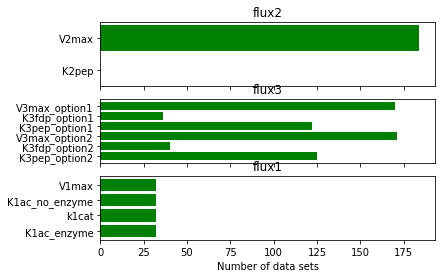

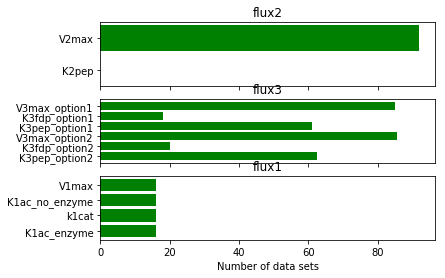

In [2]:
# script for kotte model identifiability without noise in input experimental data
import numpy as np
from generate_expdata import generate_expdata
from simulate_data import arrange_experimental_data
from kotte_model import establish_kotte_flux_identifiability
from process_ident_data import process_info_sample
from process_ident_data import parameter_plot_data_per_sample
from plot_ident_results import flux_parameter_plot

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get experimental system steady state data without noise
exp_xss, exp_fss, exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values, noise=0)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])
# choose numbr of experimental datasets for which identifiability is to be calculated
choose = range(0, 200)
# get combinations of experimental datasets
experimental_datasets = arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 3, exp_flux_index, choose)

# identifiability for all kotte fluxes
ident_details = establish_kotte_flux_identifiability(experimental_datasets, choose=choose)
print('Perturbation analysis for identifiability complete.\n')

# data processing
data_list, original_data_ident, combo_data_ident, max_parameter = process_info_sample(ident_details,
                                                                                      experimental_datasets,
                                                                                      perturbation_details)

# plot results
# file_destination = 'C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\\figure_1'
# plot parameters for each flux and the number of data sets that enable their identification
# get data for plots
total_ident_data, fraction_ident_data, all_boolean_p_id = parameter_plot_data_per_sample(original_data_ident, 1)
# plot
flux_parameter_plot(total_ident_data)
flux_parameter_plot(fraction_ident_data)

# get different classes of datasets (containing different experiments)
# from process_ident_data import experiments_in_ident_data
# experiment_sets = [[0], [1, 2], [3, 4, 5, 6, 7], [8, 9, 10, 11, 12], [13, 14, 15, 16, 17]]
# exp_data_parameter_info = experiments_in_ident_data(all_boolean_p_id,
#                                           experimental_datasets,
#                                           experiment_sets, [])

# from process_ident_data import experiment_position_based_info
# all_parameter_position_based_info = experiment_position_based_info(exp_data_parameter_info)

# from plot_ident_results import parameter_experiment_type_plot
# parameter_experiment_type_plot(all_parameter_position_based_info)